In [36]:
#mapping crump baffin bay data
#data: doi:10.18739/A2ST7DX28
#article: https://doi.org/10.1016/j.quascirev.2021.107179


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [24]:
#reading in my csv

crump_sites = pd.read_csv('Intro-Python/crumpages.csv')

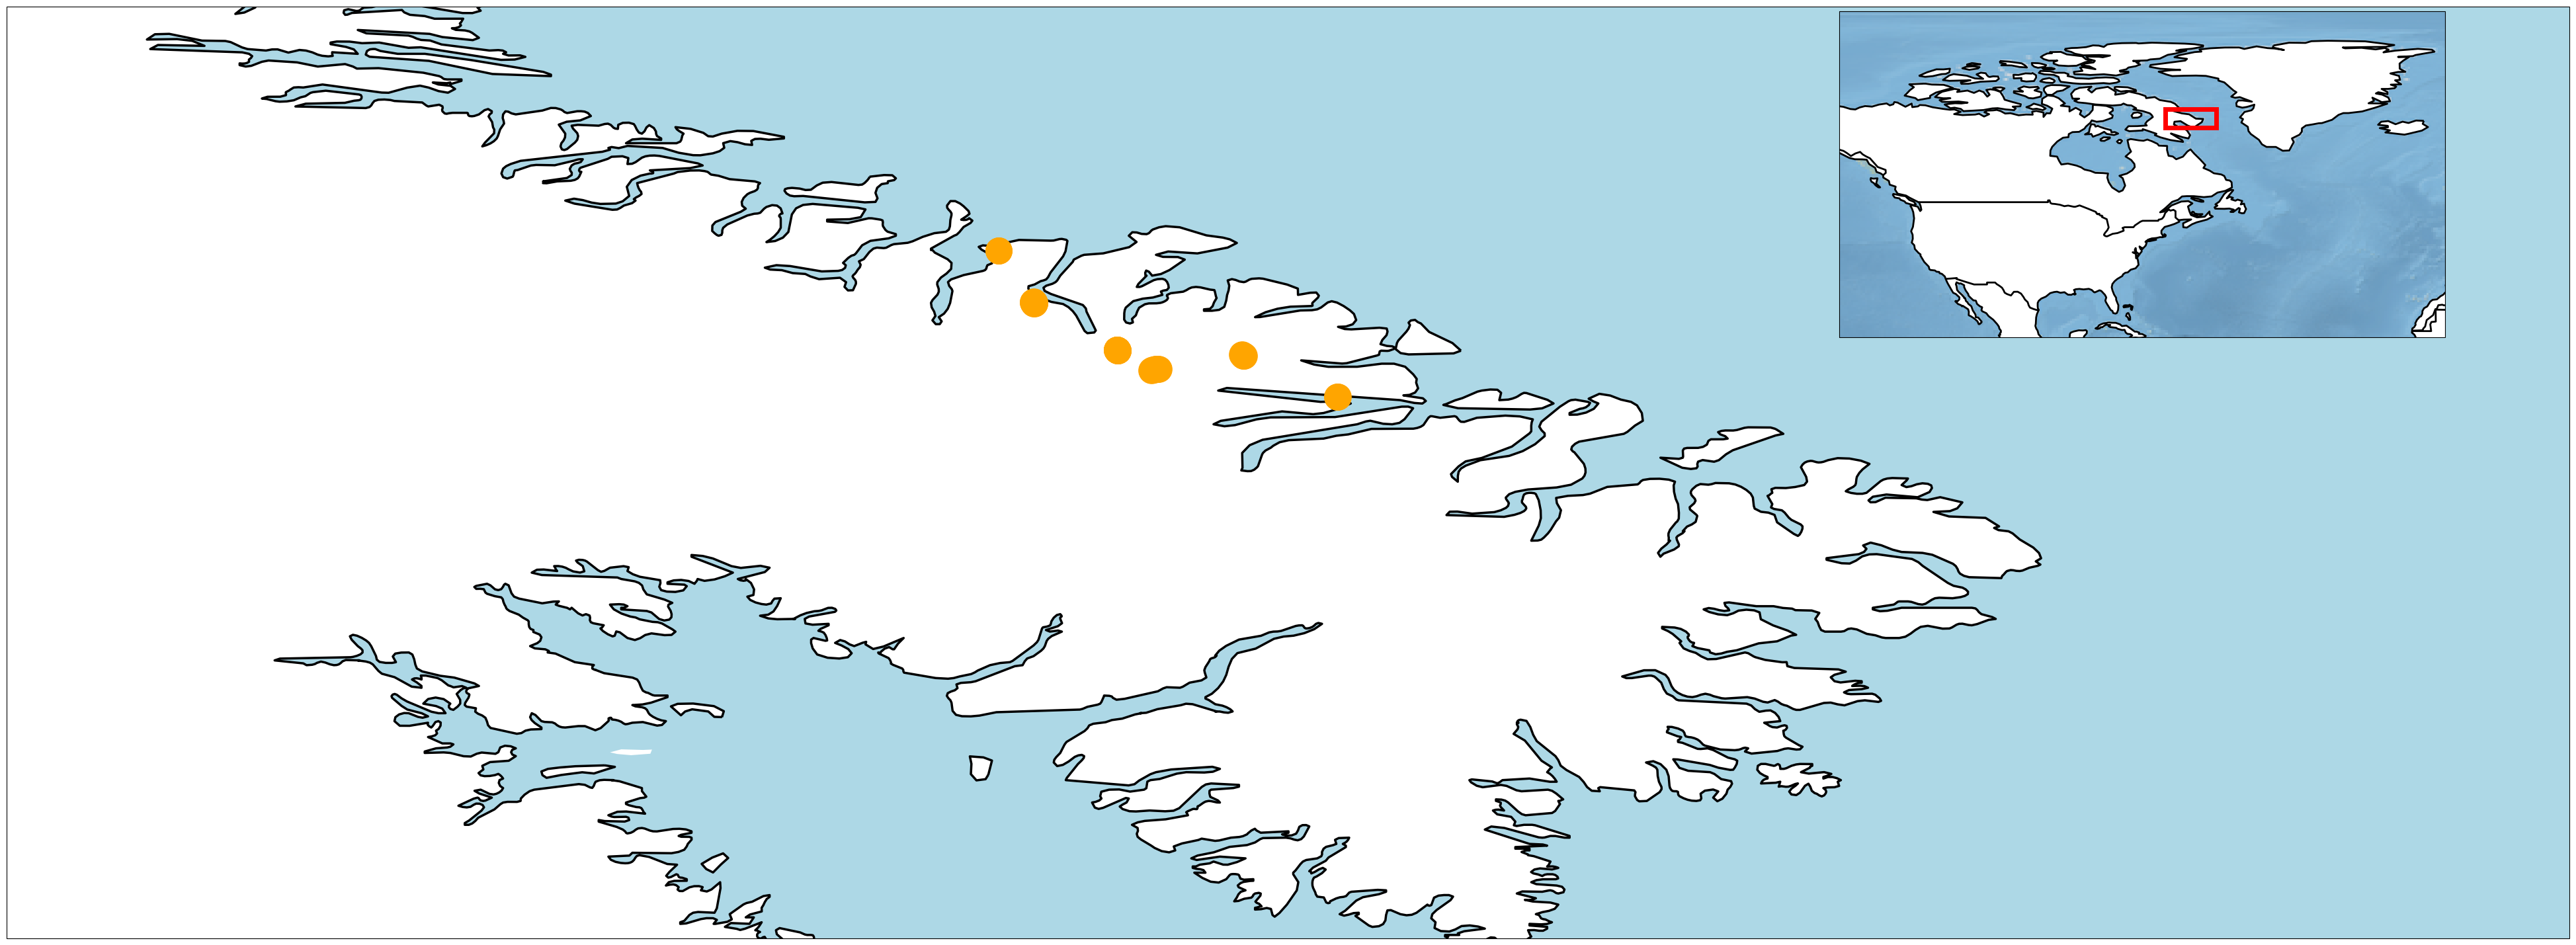

In [153]:
import cartopy.io.shapereader as shpreader

ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(zorder=0) #putting coastlines first
ax.add_feature(cartopy.feature.LAND,facecolor='white', zorder=1) #adding land, changing face and edge colors
ax.add_feature(cartopy.feature.OCEAN,facecolor='lightblue', zorder=2)
ax.add_feature(cartopy.feature.BORDERS,edgecolor = 'black', linewidth = 2.5, zorder=3)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor = 'black', linewidth = 2.5, zorder =3)
ax.set_extent([-70, -59, 65, 69], crs=ccrs.PlateCarree()) #changing the spatial extent we see on our map
ax.scatter(crump_sites['Longitude'], crump_sites['Latitude'], s=800, c='orange', zorder=4, transform=ccrs.PlateCarree())


axins = inset_axes(ax, width = "33%", height = "35%", loc = "upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
#axins.add_feature(cartopy.feature.LAND, facecolor ='white', edgecolor = 'gray', zorder=1)
#axins.add_feature(cartopy.feature.OCEAN,facecolor='lightblue', zorder=2)
axins.add_feature(cartopy.feature.BORDERS,edgecolor = 'black', linewidth = 2, zorder=2)
axins.add_feature(cartopy.feature.COASTLINE, edgecolor = 'black', linewidth = 2, zorder =2)
axins.set_extent([-140, -10, 20, 90], crs=ccrs.PlateCarree())
axins.stock_img()



#putting red square in the inset that shows the extent of the main map
from matplotlib.patches import Rectangle

main_extent = [-70, -59, 65, 69] 

rect_left = main_extent[0]
rect_bottom = main_extent[2]
rect_width = main_extent[1] - main_extent[0]
rect_height = main_extent[3] - main_extent[2]


red_rect = Rectangle((rect_left, rect_bottom), rect_width, rect_height, fill=False, edgecolor='red', linewidth=5, transform=ccrs.PlateCarree(), zorder=3)

axins.add_patch(red_rect)